## Install and import necessary packages

In [1]:
import qulacs
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

ModuleNotFoundError: No module named 'matplotlib'

## Construct ansatz

In [7]:
from qulacs import QuantumState, QuantumCircuit
from qulacs.gate import CZ, RY, RZ, merge

In [15]:
def ansatz_circuit(n_qubit, level, theta_list):
    circuit = QuantumCircuit(n_qubit)
    for l in range(level):
        for i in range(n_qubit):
            circuit.add_gate(
                merge(
                    RY(i, theta_list[2 * i + 2 * n_qubit * l]),
                    RZ(i, theta_list[2 * i + 1 + 2 * n_qubit * l]),
                )
            )
        for i in range(n_qubit // 2):
            circuit.add_gate(CZ(2 * i, 2 * i + 1))
        for i in range(n_qubit // 2 - 1):
            circuit.add_gate(CZ(2 * i + 1, 2 * i + 2))
    for i in range(n_qubit):
        circuit.add_gate(
            merge(
                RY(i, theta_list[2 * i + 2 * n_qubit * level]),
                RZ(i, theta_list[2 * i + 1 + 2 * n_qubit * level]),
            )
        )

    return circuit

## Define cost function

In [16]:
def cost(theta_list, n_qubit, level):
    # Prepare |00...0>
    state = QuantumState(n_qubit)
    # Construct quantum circuit
    circuit = ansatz_circuit(n_qubit, level, theta_list)
    # Operate quantum circuit on state
    circuit.update_quantum_state(state)
    # Calcuulate expectation value of Hamiltonian
    hamiltonian = create_qulacs_hamiltonian(n_qubit)
    return hamiltonian.get_expectation_value(state)

## Run VQE

In [34]:
n_qubit = 13
level = 3

In [35]:
cost_history = []
init_theta_list = np.random.random(2 * n_qubit * (level + 1)) * 1e-1
cost_history.append(cost(init_theta_list, n_qubit, level))
method = "BFGS"
# Nelder-Mead, Powell, CG, Newton-CG, L-BFGS-B, TNC, COBYLA, SLSQP, trust-constr, dogleg, trust-ncg, trust-exact, trust-krylov
options = {"disp": True, "maxiter": 50, "gtol": 1e-6}

num_iter = 1


def callback(x):
    global num_iter
    cost_val = cost(x, n_qubit, level)
    cost_history.append(cost_val)
    print(f'{num_iter}/{options["maxiter"]}\t{cost_val}')
    num_iter += 1


print("Iter\tcost")
opt = minimize(
    cost,
    init_theta_list,
    args=(n_qubit, level),
    method=method,
    options=options,
    callback=callback,
)

Iter	cost
1	-1.6181058583843677
2	-1.6189896532893442
3	-1.7588917473699561
4	-1.956455343598472
5	-1.9878284977450853
6	-1.9962788076355507
7	-1.9998723592079584
8	-1.999951936979173
9	-1.999963219425712
10	-1.9999791204466302
11	-1.9999930581589125
12	-1.9999965668492168
13	-1.9999967703745762
14	-1.9999968197020723
15	-1.9999969093466328
16	-1.9999970691600721
17	-1.999997325873095
18	-1.999997561407895
19	-1.9999976289391386
20	-1.9999976978202216
21	-1.9999977493662915
22	-1.9999978400690233
23	-1.999998001686986
24	-1.9999982824486302
25	-1.9999987355523907
26	-1.99999931253876
27	-1.9999996650566343
28	-1.9999998480883605
29	-1.9999998673782236
30	-1.999999867804763
31	-1.9999998681672813
32	-1.9999998688448761
33	-1.9999998701200719
34	-1.9999998724752868
35	-1.9999998761699391
36	-1.9999998824951746
37	-1.9999998927059797
38	-1.9999999103140367
39	-1.999999938518468
40	-1.9999999770292838
41	-1.9999999949294767
42	-1.9999999994588296
43	-1.9999999998966453
44	-1.99999999994197

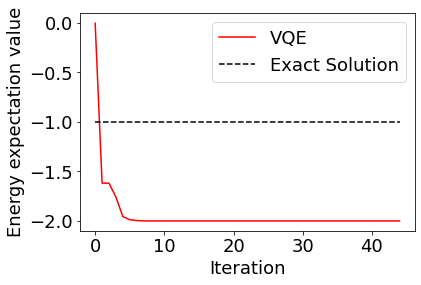

In [36]:
plt.rcParams["font.size"] = 18
plt.plot(cost_history, color="red", label="VQE")
plt.plot(
    range(len(cost_history)),
    [-1.0] * len(cost_history),
    linestyle="dashed",
    color="black",
    label="Exact Solution",
)
plt.xlabel("Iteration")
plt.ylabel("Energy expectation value")
plt.legend()
plt.show()

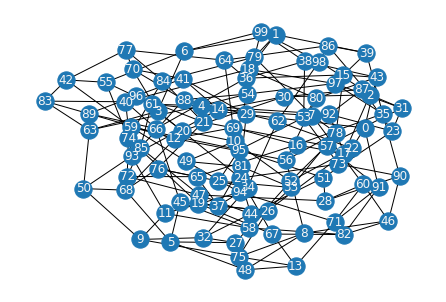

In [1]:
from maxcut_instance_generator import regular_graph

model = regular_graph(100, 4, draw=True)

In [2]:
from encoding import RandomAccessEncoder

qrac_3_1 = RandomAccessEncoder(3, 1)
qrac_2_1 = RandomAccessEncoder(2, 1)
qrac_1_1 = RandomAccessEncoder(1, 1)

In [3]:
H_3_1 = qrac_3_1.generate_hamiltonian(model)
H_2_1 = qrac_2_1.generate_hamiltonian(model)
H_1_1 = qrac_1_1.generate_hamiltonian(model)

In [6]:
qrac_3_1.print_hamiltonian(H_3_1)

(0.75+0j)ZIIIIIIIIIIIIZIIIIIIIIIIIIIIIIIIII
(0.75+0j)ZIIIIIIIIIIIIIZIIIIIIIIIIIIIIIIIII
(0.75+0j)ZIIIIIIIIIIIIIIIZIIIIIIIIIIIIIIIII
(0.75+0j)ZIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIIII
(0.75+0j)XIIIIIIIIIIZIIIIIIIIIIIIIIIIIIIIII
(0.75+0j)XIIIIIIIIIIIXIIIIIIIIIIIIIIIIIIIII
(0.75+0j)XIIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIII
(0.75+0j)XIIIIIIIIIIIIIIIIIIIIXIIIIIIIIIIII
(0.75+0j)YIIIIIIIIIIIZIIIIIIIIIIIIIIIIIIIII
(0.75+0j)YIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIIII
(0.75+0j)YIIIIIIIIIIIIIXIIIIIIIIIIIIIIIIIII
(0.75+0j)YIIIIIIIIIIIIIIIIIIIIIZIIIIIIIIIII
(0.75+0j)IZIIIIIIIIIZIIIIIIIIIIIIIIIIIIIIII
(0.75+0j)IZIIIIIIIIIIIXIIIIIIIIIIIIIIIIIIII
(0.75+0j)IZIIIIIIIIIIIIIIIIIIIIIIIIXIIIIIII
(0.75+0j)IZIIIIIIIIIIIIIIIIIIZIIIIIIIIIIIII
(0.75+0j)IXIIIIIIIIIIIIIIIIYIIIIIIIIIIIIIII
(0.75+0j)IXIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXII
(0.75+0j)IXIIIIIIIIIIIIIIIIIIIIIIIIXIIIIIII
(0.75+0j)IXIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIII
(0.75+0j)IYIIIIIIIIIIIYIIIIIIIIIIIIIIIIIIII
(0.75+0j)IYIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIII
(0.75+0j)IYIIIIIIIIIIIIIIIIIIIII

In [7]:
qrac_2_1.print_hamiltonian(H_2_1)

(0.5+0j)ZIIIIIIIIIIIIIIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII
(0.5+0j)ZIIIIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIIIIIIIIIIIIIIII
(0.5+0j)ZIIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIIIIIIIIIIIII
(0.5+0j)ZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIIIIIII
(0.5+0j)XIIIIIIIIIIIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII
(0.5+0j)XIIIIIIIIIIIIIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII
(0.5+0j)XIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIIIIIIIIIIIIII
(0.5+0j)XIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIIIII
(0.5+0j)IZIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII
(0.5+0j)IZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIII
(0.5+0j)IZIIIIIIIIIIIIIIIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIII
(0.5+0j)IZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIIII
(0.5+0j)IXIIIIIIIIIIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII
(0.5+0j)IXIIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII
(0.5+0j)IXIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIIIIIIIIIII
(0.5+0j)IXIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIIIIIII
(0.5+0j)IIZIIIIIIIIIIIII

In [8]:
qrac_1_1.print_hamiltonian(H_1_1)

(0.25+0j)ZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII
(0.25+0j)ZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII
(0.25+0j)ZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII
(0.25+0j)ZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIIIIIIIIIIIII
(0.25+0j)IZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII
(0.25+0j)IZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII
(0.25+0j)IZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIII
(0.25+0j)IZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII
(0.25+0j)IIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII
(0.25+0j)I